<table style="color:red">
    <thead>
        <tr><th>E1</th><th>E2</th><th>E3</th><th>E4</th><th>Total</th></tr>
    </thead>
    <tbody>
        <tr>
            <td>1</td>
            <td>1</td>
            <td>1.5</td>
            <td>1.5</td>
            <td>5</td>
        </tr>
    </tbody>
</table>

# Machine Learning 2 Exercise Set 5
# Ulzii-Utas

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import statistics
from numba import jit, cuda
import time

## E1

In [90]:
n = 50
X = np.linspace(-10, 10, n).reshape(-1,1)

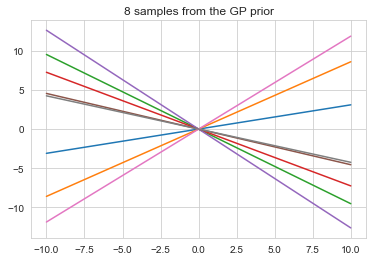

In [91]:
# Kernel function a
def kernel_a(x, x_):    
    product = np.zeros([len(x), len(x_)]);
    
    for i in range(len(x)):
        for j in range(len(x_)):            
            product[i][j] = x[i] * x_[j];
    return product

K_covariance_matrix = kernel_a(X, X)

# Get sqrt of the covariance matrix
B = sp.linalg.sqrtm(K_covariance_matrix);

#initialize 50x8 matrix of random distribution with 
#mean 0 and std 1 and dot product with sqrt of covariance matrix
# to get our prior
f_prior = np.dot(B, np.random.normal(0, 1, size=(n,8)));

plt.plot(X, f_prior);
plt.title('8 samples from the GP prior');
plt.show();

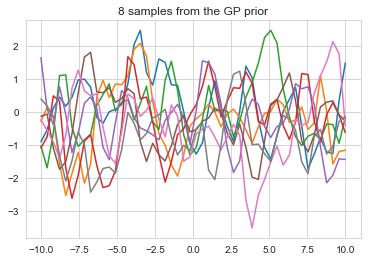

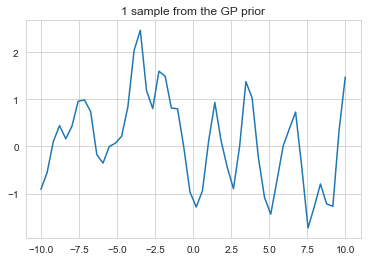

In [92]:
# Kernel function b
def kernel_b(x, x_, beta):    
    sqdist = np.zeros([len(x), len(x_)]);
    
    for i in range(len(x)):
        for j in range(len(x_)):         
            
            sqdist[i][j] = (x[i] - x_[j])**2;
            sqdist[i][j] = np.exp(-0.5 * (1/beta) * sqdist[i][j]);
            
    return sqdist;

beta = 0.25;
K_covariance_matrix = kernel_b(X, X, beta);

# Get sqrt of the covariance matrix
B = sp.linalg.sqrtm(K_covariance_matrix);

#initialize 50x8 matrix of random distribution with 
#mean 0 and std 1 and dot product with sqrt of covariance matrix
# to get our prior
f_prior = np.dot(B, np.random.normal(0, 1, size=(n,8)))

plt.plot(X, f_prior)
plt.title('8 samples from the GP prior')
plt.show()

plt.plot(X, f_prior[:,0])
plt.title('1 sample from the GP prior')
plt.show()

For kernel a, linear function y(x) = ax + b model would fit. For kernel b, maybe sinus function would fit.

<p style="color:red">discussion too short, only linear functions through origin obtained -1</p>

## E2

#### For kernel a

In [93]:
K_covariance_matrix_a = kernel_a(X_20, X_20);

In [94]:
print(K_covariance_matrix_a);

[[ 100.   90.   80.   70.   60.   50.   40.   30.   20.   10.    0.  -10.
   -20.  -30.  -40.  -50.  -60.  -70.  -80.  -90. -100.]
 [  90.   81.   72.   63.   54.   45.   36.   27.   18.    9.    0.   -9.
   -18.  -27.  -36.  -45.  -54.  -63.  -72.  -81.  -90.]
 [  80.   72.   64.   56.   48.   40.   32.   24.   16.    8.    0.   -8.
   -16.  -24.  -32.  -40.  -48.  -56.  -64.  -72.  -80.]
 [  70.   63.   56.   49.   42.   35.   28.   21.   14.    7.    0.   -7.
   -14.  -21.  -28.  -35.  -42.  -49.  -56.  -63.  -70.]
 [  60.   54.   48.   42.   36.   30.   24.   18.   12.    6.    0.   -6.
   -12.  -18.  -24.  -30.  -36.  -42.  -48.  -54.  -60.]
 [  50.   45.   40.   35.   30.   25.   20.   15.   10.    5.    0.   -5.
   -10.  -15.  -20.  -25.  -30.  -35.  -40.  -45.  -50.]
 [  40.   36.   32.   28.   24.   20.   16.   12.    8.    4.    0.   -4.
    -8.  -12.  -16.  -20.  -24.  -28.  -32.  -36.  -40.]
 [  30.   27.   24.   21.   18.   15.   12.    9.    6.    3.    0.   -3.
    -6.  

#### For kernel b

In [95]:
beta = 0.25;
K_covariance_matrix_b = kernel_b(X_20, X_20, beta);

In [96]:
print(K_covariance_matrix_b);

[[1.00000000e+000 1.35335283e-001 3.35462628e-004 1.52299797e-008
  1.26641655e-014 1.92874985e-022 5.38018616e-032 2.74878501e-043
  2.57220937e-056 4.40853133e-071 1.38389653e-087 7.95674389e-106
  8.37894253e-126 1.61608841e-147 5.70904011e-171 3.69388307e-196
  4.37749104e-223 9.50144065e-252 3.77724997e-282 2.75032531e-314
  0.00000000e+000]
 [1.35335283e-001 1.00000000e+000 1.35335283e-001 3.35462628e-004
  1.52299797e-008 1.26641655e-014 1.92874985e-022 5.38018616e-032
  2.74878501e-043 2.57220937e-056 4.40853133e-071 1.38389653e-087
  7.95674389e-106 8.37894253e-126 1.61608841e-147 5.70904011e-171
  3.69388307e-196 4.37749104e-223 9.50144065e-252 3.77724997e-282
  2.75032531e-314]
 [3.35462628e-004 1.35335283e-001 1.00000000e+000 1.35335283e-001
  3.35462628e-004 1.52299797e-008 1.26641655e-014 1.92874985e-022
  5.38018616e-032 2.74878501e-043 2.57220937e-056 4.40853133e-071
  1.38389653e-087 7.95674389e-106 8.37894253e-126 1.61608841e-147
  5.70904011e-171 3.69388307e-196 4.37

In kernel (a), we have minus covariances and ranges from $min(x)*max(x)$ to $max(x)^2$  while kernel (b) can only have values from 0 to 1. Also, The Kernel value is chaning linearly in Kernel a.

<p style="color:red">use a heatmap to visualize the kernel, this way you will sport the important differences -1</p>

## E3

In [97]:
testdatax = np.array(pd.read_fwf('.\Datafiles-Exer-4\Testdatax.txt').columns).astype(float);
testdatay = np.array(pd.read_fwf('.\Datafiles-Exer-4\Testdatay.txt').columns).astype(float);

traindatax = np.array(pd.read_fwf('.\Datafiles-Exer-4\Traindatax.txt').columns).astype(float);
traindatay = np.array(pd.read_fwf('.\Datafiles-Exer-4\Traindatay.txt').columns).astype(float);

To prepare for GPR, we calculate the covariance function for our training dataset $x$ and test dataset $x_*$.

\begin{equation*}
K =  \begin{vmatrix}
k(x_1, x_1) & k(x_1, x_1) & \dots & k(x_1, x_n) \\
k(x_2, x_1) & k(x_2, x_2) & \dots & k(x_2, x_n) \\
\vdots      & \vdots      & \ddots & \vdots      \\
k(x_n, x_1) & k(x_n, x_2) & \dots & k(x_n, x_n)
\end{vmatrix}
\end{equation*}

\begin{equation*}
K_* =  \begin{vmatrix}
k(x_{*1}, x_1) & k(x_{*1}, x_1) & \dots & k(x_{*1}, x_n) \\
k(x_{*2}, x_1) & k(x_{*2}, x_2) & \dots & k(x_{*2}, x_n) \\
\vdots         & \vdots         & \ddots& \vdots         \\
k(x_{*n}, x_1) & k(x_{*n}, x_2) & \dots & k(x_{*n}, x_n)
\end{vmatrix}
\end{equation*}

\begin{equation*}
K_{**} =  \begin{vmatrix}
k(x_{*1}, x_{*1}) & k(x_{*1}, x_{*1}) & \dots & k(x_{*1}, x_{*n}) \\
k(x_{*2}, x_{*1}) & k(x_{*2}, x_{*2}) & \dots & k(x_{*2}, x_{*n}) \\
\vdots            & \vdots            & \ddots& \vdots         \\
k(x_{*n}, x_{*n}) & k(x_{*n}, x_{*n}) & \dots & k(x_{*n}, x_{*n})
\end{vmatrix}
\end{equation*}

Since the key assumption in GP modelling is that our data can be represented as a sample from a multivariate Gaussian distribution, we have: 

\begin{equation*}
\begin{vmatrix}
y \\
y_*
\end{vmatrix} \sim \mathcal{N} \bigg( 0,
\begin{vmatrix}
K & K_*^T \\
K_* & K_{**}
\end{vmatrix}
\bigg)
\end{equation*}

The probability of $p(y_*|y)$ follows gaussian distribution:

\begin{equation*}
p(y_*|y) \sim \mathcal{N} \bigg( K_* K^{-1}y, K_{**}-K_*K^{-1}K_*^T \bigg)
\end{equation*}

\begin{equation*}
m(x) = K_* K^{-1}y\\
\sigma^2(x) = K_{**}-K_*K^{-1}K_*^T
\end{equation*}



In [222]:
def GPR_Kernel_a(beta_epsilon):

    K_train_train = kernel_a(traindatax, traindatax);
    K_train_train = K_train_train + beta_epsilon * np.identity(len(traindatax));
#     K_train_train = K_train_train + np.random.normal(0, beta_epsilon, size=(len(traindatax), len(traindatax))) * np.identity(len(traindatax));

    K_test_train = kernel_a(testdatax, traindatax);

    K_tt = kernel_a(testdatax, testdatax).diagonal() + beta_epsilon;
#     K_tt = kernel_a(testdatax, testdatax).diagonal() + np.abs(np.random.normal(0, beta_epsilon, size=(len(testdatax))));
    
    mean_x = np.matmul(np.matmul(K_test_train, np.linalg.inv(K_train_train)), traindatay);
    var_x = np. zeros(len(testdatay));

    for i in range(len(testdatay)):    
        var_x[i] = K_tt[i] - np.matmul(np.matmul(K_test_train[i,:], np.linalg.inv(K_train_train)), np.transpose(K_test_train[i,:]));
        
    testdatay_prediction = np. zeros(len(testdatay));
    for i in range(len(testdatay)):
        testdatay_prediction[i] = np.random.normal(mean_x[i], var_x[i], 1);
        
    return testdatay_prediction;

In [223]:
def GPR_Kernel_b(beta_epsilon, beta):

    K_train_train = kernel_b(traindatax, traindatax, beta);
    K_train_train = K_train_train + beta_epsilon * np.identity(len(traindatax));
#     K_train_train = K_train_train + np.random.normal(0, beta_epsilon, size=(len(traindatax), len(traindatax))) * np.identity(len(traindatax));


    K_test_train = kernel_b(testdatax, traindatax, beta);

    K_tt = kernel_b(testdatax, testdatax, beta).diagonal() + beta_epsilon;
#     K_tt = kernel_b(testdatax, testdatax, beta).diagonal() + np.abs(np.random.normal(0, beta_epsilon, size=(len(testdatax))));
    
    mean_x = np.matmul(np.matmul(K_test_train, np.linalg.inv(K_train_train)), traindatay);
    var_x = np. zeros(len(testdatay));

    for i in range(len(testdatay)):    
        var_x[i] = K_tt[i] - np.matmul(np.matmul(K_test_train[i,:], np.linalg.inv(K_train_train)), np.transpose(K_test_train[i,:]));
        
    testdatay_prediction = np. zeros(len(testdatay));

    for i in range(len(testdatay)):
        testdatay_prediction[i] = np.random.normal(mean_x[i], var_x[i], 1);
        
    return testdatay_prediction;

In [224]:
beta_epsilon = 0.01;
beta = 0.25;
testdatay_prediction_kernel_a = GPR_Kernel_a(beta_epsilon);
testdatay_prediction_kernel_b = GPR_Kernel_b(beta_epsilon, beta);

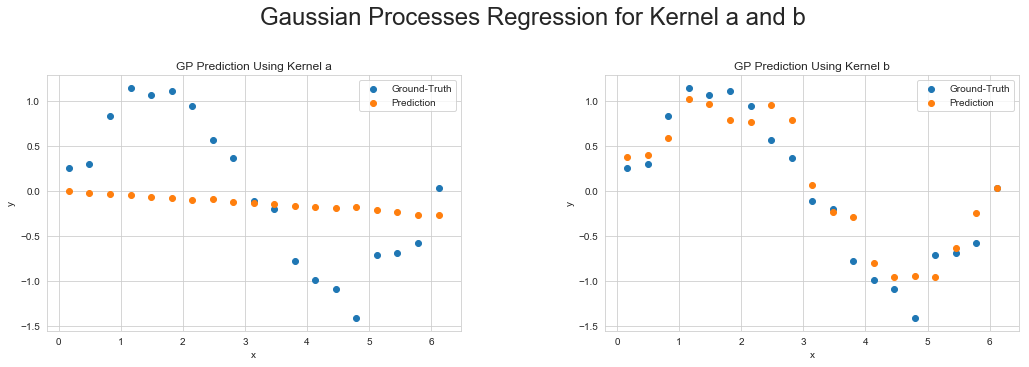

In [229]:
plt.figure(figsize=(15, 5));
plt.suptitle('Gaussian Processes Regression for Kernel a and b', fontsize=24);

plt.subplot(1,2,1)
plt.scatter(testdatax, testdatay, label = 'Ground-Truth');
plt.scatter(testdatax, testdatay_prediction_kernel_a, label = 'Prediction');
plt.title('GP Prediction Using Kernel a');
plt.xlabel('x');
plt.ylabel('y');
plt.legend();

plt.subplot(1,2,2)
plt.scatter(testdatax, testdatay, label = 'Ground-Truth');
plt.scatter(testdatax, testdatay_prediction_kernel_b, label = 'Prediction');
plt.title('GP Prediction Using Kernel b');
plt.legend();
plt.xlabel('x');
plt.ylabel('y');

plt.subplots_adjust(top=0.79, bottom=0.08, left=0.05, right=0.95, hspace=0.40, wspace=0.35)
plt.show()

Since Kernel a is linear modeled kernel, we cannot successfully predict a sinusoidal data. However, since our ground-truth is more like sinusoidal in shape, we predicted quite well using sinusoidal kernel b.

<p style="color:red">Do not sample to obtain prediction, use mean and std diretly! -1</p>
<p style="color:red">Plot of std missing -0.5</p>

## E4

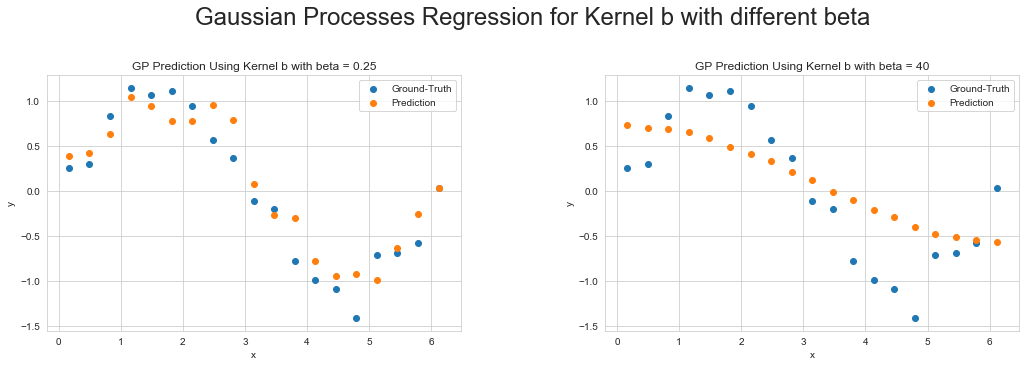

In [230]:
testdatay_prediction_kernel_b_025 = GPR_Kernel_b(beta_epsilon, 0.25);
testdatay_prediction_kernel_b_40 = GPR_Kernel_b(beta_epsilon, 40);

plt.figure(figsize=(15, 5));
plt.suptitle('Gaussian Processes Regression for Kernel b with different beta', fontsize=24);

plt.subplot(1,2,1)
plt.scatter(testdatax, testdatay, label = 'Ground-Truth');
plt.scatter(testdatax, testdatay_prediction_kernel_b_025, label = 'Prediction');
plt.title('GP Prediction Using Kernel b with beta = 0.25');
plt.legend();
plt.xlabel('x');
plt.ylabel('y');

plt.subplot(1,2,2)
plt.scatter(testdatax, testdatay, label = 'Ground-Truth');
plt.scatter(testdatax, testdatay_prediction_kernel_b_40, label = 'Prediction');
plt.title('GP Prediction Using Kernel b with beta = 40');
plt.legend();
plt.xlabel('x');
plt.ylabel('y');

plt.subplots_adjust(top=0.79, bottom=0.08, left=0.05, right=0.95, hspace=0.40, wspace=0.35)
plt.show()

Kernel b is controlled by tuning parameter beta, which is getting more smoother by increasing the value.

<p style="color:red">f. Increasing beta should decrease smoothness. There has to be an error -1.5</p>

## E5

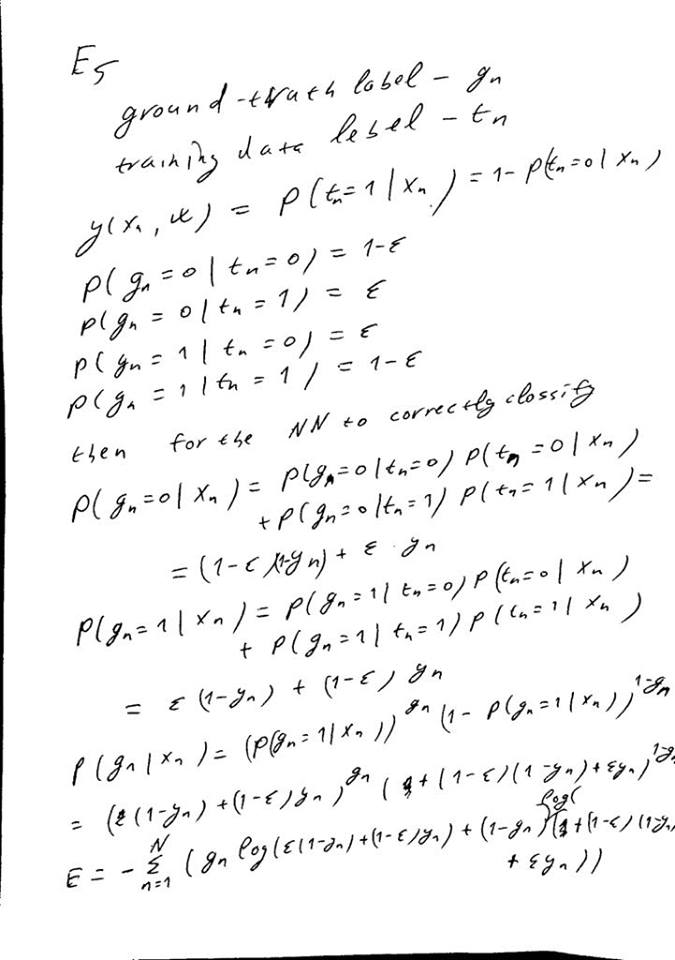

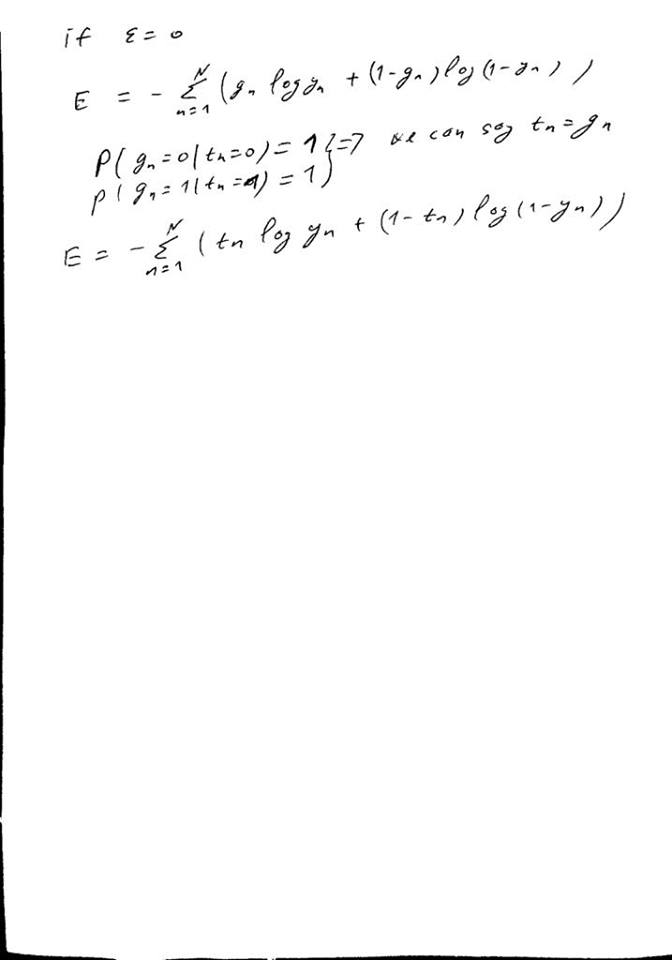

## E6

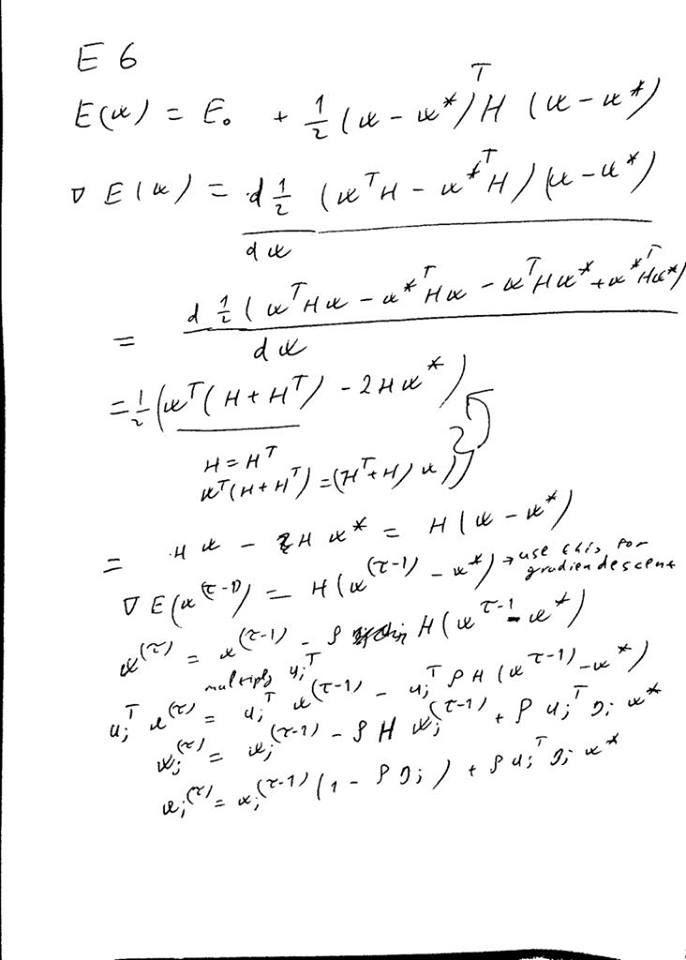